In [156]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [157]:
#تشکیل دیتا فریم
df = pd.read_csv(r"C:\Users\donya\Downloads\Australian Vehicle Prices.csv")

In [158]:
df.head(10)

,car_name,manufacture,ownership,transmission,fuel_type,engine,kms_driven,Seats,car_prices
0,Ssangyong,2022,0st Ownership,Automatic,Diesel,4 cyl,5595,7 Seats,51990
1,MG,2022,1st Ownership,Automatic,Premium,4 cyl,16,5 Seats,19990
2,BMW,2022,1st Ownership,Automatic,Premium,4 cyl,8472,4 Seats,108988
3,Mercedes-Benz,2011,1st Ownership,Automatic,Premium,8 cyl,136517,4 Seats,32990
4,Renault,2022,1st Ownership,Automatic,Unleaded,4 cyl,1035,5 Seats,34990
5,Toyota,2004,1st Ownership,Automatic,Unleaded,-,160230,NaN,9990
6,Land,2017,1st Ownership,Automatic,Diesel,4 cyl,67662,4 Seats,62280
7,Nissan,2000,1st Ownership,Automatic,Unleaded,4 cyl,300539,5 Seats,2995
8,Toyota,2013,1st Ownership,Automatic,Premium,4 cyl,82012,4 Seats,24888
9,Honda,2014,1st Ownership,Automatic,Hybrid,4 cyl,38229,5 Seats,17900


## Cleaning Our data🧹

In [159]:
#می خواهیم بدانیم در هر ستونی چه مقادیری وحود دارن
df['car_name'].unique()

array(['Ssangyong', 'MG', 'BMW', 'Mercedes-Benz', 'Renault', 'Toyota',
       'Land', 'Nissan', 'Honda', 'Volkswagen', 'Mitsubishi', 'Ford',
       'Subaru', 'Hyundai', 'Jeep', 'Volvo', 'Mazda', 'Abarth', 'Holden',
       'Audi', 'Kia', 'Mini', 'Peugeot', 'Suzuki', 'Dodge', 'Porsche',
       'Daihatsu', 'Isuzu', 'Lexus', 'Jaguar', 'Rolls-Royce', 'Skoda',
       'Fiat', 'Haval', 'Citroen', 'LDV', 'HSV', 'Foton', 'Mahindra',
       'Maserati', 'Alfa', 'GWM', 'Ram', 'Tesla', 'Genesis', 'Chrysler',
       'Great', 'Opel', 'Saab', 'Bentley', 'Rover', 'Ferrari', 'Cupra',
       'Chevrolet', 'Lamborghini', 'FPV', 'McLaren', 'Chery', 'Iveco',
       'Hummer', 'Infiniti', 'BYD', 'Tata', 'Aston', 'Daewoo', 'Proton',
       'Geely', 'Smart', 'Ineos', 'Caterham', 'Hino', 'International',
       'Lotus', 'Polestar', 'Datsun', 'Packard'], dtype=object)

In [160]:
df['ownership'].unique()

array(['0st Ownership', '1st Ownership'], dtype=object)

In [161]:
df['transmission'].unique()

array(['Automatic', 'Manual', '-'], dtype=object)

In [162]:
df['fuel_type'].unique()

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', 'Petrol', 'Electric',
       'LPG', 'Leaded', 'Other'], dtype=object)

In [163]:
df['engine'].unique()

array(['4 cyl', '8 cyl', '-', '3 cyl', '6 cyl', '5 cyl', '12 cy', '0 L',
       '2 cyl', '10 cy', '2 L'], dtype=object)

In [164]:
df['Seats'].unique()

array([' 7 Seats', ' 5 Seats', ' 4 Seats', nan, ' 2 Seats', ' 3 Seats',
       ' 14 Seats', ' 8 Seats', ' 6 Seats', ' 9 Seats', ' 11 Seats',
       ' 12 Seats', ' 22 Seats', ' 15 Seats'], dtype=object)

In [165]:
#در ستون هایی که می خواهیم فقط عدد باشند حروف را حذف کردیم
df['ownership'] = df['ownership'].str.replace('st Ownership','')
df.head()

,car_name,manufacture,ownership,transmission,fuel_type,engine,kms_driven,Seats,car_prices
0,Ssangyong,2022,0,Automatic,Diesel,4 cyl,5595,7 Seats,51990
1,MG,2022,1,Automatic,Premium,4 cyl,16,5 Seats,19990
2,BMW,2022,1,Automatic,Premium,4 cyl,8472,4 Seats,108988
3,Mercedes-Benz,2011,1,Automatic,Premium,8 cyl,136517,4 Seats,32990
4,Renault,2022,1,Automatic,Unleaded,4 cyl,1035,5 Seats,34990


In [166]:
df['engine'] = df['engine'].str.replace(' cyl','')
df.head()

,car_name,manufacture,ownership,transmission,fuel_type,engine,kms_driven,Seats,car_prices
0,Ssangyong,2022,0,Automatic,Diesel,4,5595,7 Seats,51990
1,MG,2022,1,Automatic,Premium,4,16,5 Seats,19990
2,BMW,2022,1,Automatic,Premium,4,8472,4 Seats,108988
3,Mercedes-Benz,2011,1,Automatic,Premium,8,136517,4 Seats,32990
4,Renault,2022,1,Automatic,Unleaded,4,1035,5 Seats,34990


In [167]:
df.isna().sum()

car_name           0
manufacture        0
ownership          0
transmission       0
fuel_type          0
engine             0
kms_driven         0
Seats           1704
car_prices         2
dtype: int64

In [168]:
weird_values = ['0 L', '-', '2 L']

for val in weird_values:
    count = (df['engine'] == val).sum()
    print(f"{val}: {count} occurrence(s)")

0 L: 106 occurrence(s)
-: 1674 occurrence(s)
2 L: 1 occurrence(s)


In [169]:
#ابتدا مقادیری که در ستون موتور با بقیه خیلی متفاون بودن را پیدا کردیم نال کردیم بعد با مقداری که بیشترین تکرار را دارد پر کردیم
df = df[~df['engine'].isin(['0 L', '2 L'])]
df['engine'] = df['engine'].replace('-', np.nan)
engine_mode = df['engine'].mode()[0]
df['engine'] = df['engine'].fillna(engine_mode)

In [170]:
df['Seats'] = df['Seats'].str.replace(' Seats','')
df.head()

,car_name,manufacture,ownership,transmission,fuel_type,engine,kms_driven,Seats,car_prices
0,Ssangyong,2022,0,Automatic,Diesel,4,5595,7,51990
1,MG,2022,1,Automatic,Premium,4,16,5,19990
2,BMW,2022,1,Automatic,Premium,4,8472,4,108988
3,Mercedes-Benz,2011,1,Automatic,Premium,8,136517,4,32990
4,Renault,2022,1,Automatic,Unleaded,4,1035,5,34990


In [171]:
df.isnull().sum()

car_name           0
manufacture        0
ownership          0
transmission       0
fuel_type          0
engine             0
kms_driven         0
Seats           1703
car_prices         2
dtype: int64

In [172]:
#مقادیر تعداد صندلی ابتدا براساس نوع ماشین گروه بندی میشن و با بیشترین تکرار در اون قسمت پر میشن ولی اگر بیشترین تکرار واسه اون ماشین بی معنی باشه اونو با بیشترین مقدار کلی پر میکنه
seats_mode_global = df['Seats'].mode()[0]
df['Seats'] = df.groupby('car_name')['Seats'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else seats_mode_global)
)

In [173]:
df = df.dropna(subset=['car_prices']).reset_index(drop=True)

In [174]:
df.isnull().sum()

car_name        0
manufacture     0
ownership       0
transmission    0
fuel_type       0
engine          0
kms_driven      0
Seats           0
car_prices      0
dtype: int64

In [175]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16619    False
16620    False
16621    False
16622    False
16623    False
Length: 16624, dtype: bool

In [176]:
df['transmission'].value_counts()

transmission
Automatic    14427
Manual        1952
-              245
Name: count, dtype: int64

In [177]:
#مقادیر خالی رو با چیزی که بیشترین تکرار رو داشته پر میکنیم
df['transmission'] = df['transmission'].replace('-',  df['transmission'].mode()[0]) 

In [178]:
df['transmission'] = df['transmission'].map({'Manual': 1, 'Automatic': 0})

In [179]:
df['year_used']=2025-df['manufacture']

In [180]:
df.isnull().sum()

car_name        0
manufacture     0
ownership       0
transmission    0
fuel_type       0
engine          0
kms_driven      0
Seats           0
car_prices      0
year_used       0
dtype: int64

In [181]:
 df['fuel_type'].value_counts()

fuel_type
Unleaded    6984
Diesel      4903
Premium     3377
Hybrid       652
Petrol       645
Other         33
LPG           15
Electric      10
Leaded         5
Name: count, dtype: int64

In [182]:
#در ستون سوخت مقادیری که کمترین تکرار رو دارن رو همگی در یک دسته قرار می‌دیم
fuel_counts = df['fuel_type'].value_counts()
common_fuels = fuel_counts[fuel_counts >= 1000].index
df['fuel_type'] = df['fuel_type'].apply(lambda x: x if x in common_fuels else 'Other')

In [183]:
#ستون سوخت رو به چند ستون صفر و یکی تبدیل میکنیم
df = pd.get_dummies(df, columns=['fuel_type'], drop_first=True)

In [184]:
df['ownership']=pd.to_numeric(df['ownership'],errors='coerce')
df['Seats']=pd.to_numeric(df['Seats'],errors='coerce')

In [185]:
df.isnull().sum()

car_name              0
manufacture           0
ownership             0
transmission          0
engine                0
kms_driven            0
Seats                 0
car_prices            0
year_used             0
fuel_type_Other       0
fuel_type_Premium     0
fuel_type_Unleaded    0
dtype: int64

In [186]:
df

,car_name,manufacture,ownership,transmission,engine,kms_driven,Seats,car_prices,year_used,fuel_type_Other,fuel_type_Premium,fuel_type_Unleaded
0,Ssangyong,2022,0,0,4,5595,7,51990,3,False,False,False
1,MG,2022,1,0,4,16,5,19990,3,False,True,False
2,BMW,2022,1,0,4,8472,4,108988,3,False,True,False
3,Mercedes-Benz,2011,1,0,8,136517,4,32990,14,False,True,False
4,Renault,2022,1,0,4,1035,5,34990,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
16619,Toyota,2014,1,0,4,66000,5,29500,11,False,False,True
16620,Mercedes-Benz,2012,1,0,4,117432,5,39888,13,False,False,False
16621,Suzuki,2022,0,0,4,5165,5,35280,3,False,False,True
16622,Mercedes-Benz,2016,1,0,4,85525,5,41888,9,False,True,False


In [187]:
df.drop(columns=['manufacture'], inplace=True)
df

,car_name,ownership,transmission,engine,kms_driven,Seats,car_prices,year_used,fuel_type_Other,fuel_type_Premium,fuel_type_Unleaded
0,Ssangyong,0,0,4,5595,7,51990,3,False,False,False
1,MG,1,0,4,16,5,19990,3,False,True,False
2,BMW,1,0,4,8472,4,108988,3,False,True,False
3,Mercedes-Benz,1,0,8,136517,4,32990,14,False,True,False
4,Renault,1,0,4,1035,5,34990,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
16619,Toyota,1,0,4,66000,5,29500,11,False,False,True
16620,Mercedes-Benz,1,0,4,117432,5,39888,13,False,False,False
16621,Suzuki,0,0,4,5165,5,35280,3,False,False,True
16622,Mercedes-Benz,1,0,4,85525,5,41888,9,False,True,False


In [188]:
df.drop(columns=['car_name'], inplace=True)
df

,ownership,transmission,engine,kms_driven,Seats,car_prices,year_used,fuel_type_Other,fuel_type_Premium,fuel_type_Unleaded
0,0,0,4,5595,7,51990,3,False,False,False
1,1,0,4,16,5,19990,3,False,True,False
2,1,0,4,8472,4,108988,3,False,True,False
3,1,0,8,136517,4,32990,14,False,True,False
4,1,0,4,1035,5,34990,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...
16619,1,0,4,66000,5,29500,11,False,False,True
16620,1,0,4,117432,5,39888,13,False,False,False
16621,0,0,4,5165,5,35280,3,False,False,True
16622,1,0,4,85525,5,41888,9,False,True,False


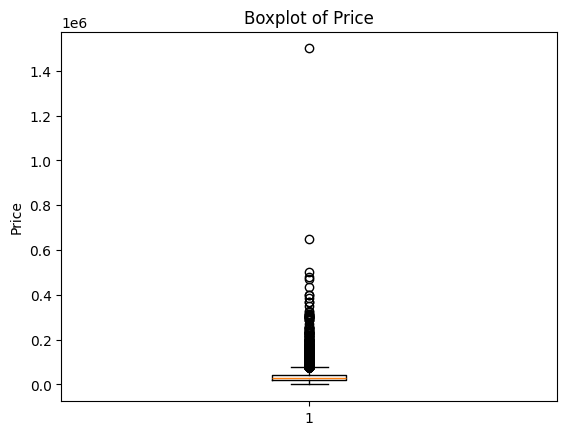

In [196]:
plt.boxplot(df['car_prices']) 
plt.title('Boxplot of Price')
plt.ylabel('Price')
plt.show()

In [197]:
#برای اینکه محاسباتمان دقیق تر بشه مقادیر پرت رو حذف می‌کنیم
column = 'car_prices' 
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 2.5 * IQR
upper_bound = Q3 + 2.5 * IQR
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print(f"تعداد داده‌های پرت در ستون '{column}': {len(outliers)}")

تعداد داده‌های پرت در ستون 'car_prices': 395


In [198]:
df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

In [199]:
df_norm = df.copy()

In [200]:
cols = ['engine', 'kms_driven', 'Seats', 'car_prices', 'year_used']

for col in cols:
    df_norm[col] = pd.to_numeric(df_norm[col], errors='coerce')

df_norm.dropna(subset=cols, inplace=True)

scaler = StandardScaler()
df_norm[cols] = scaler.fit_transform(df_norm[cols])

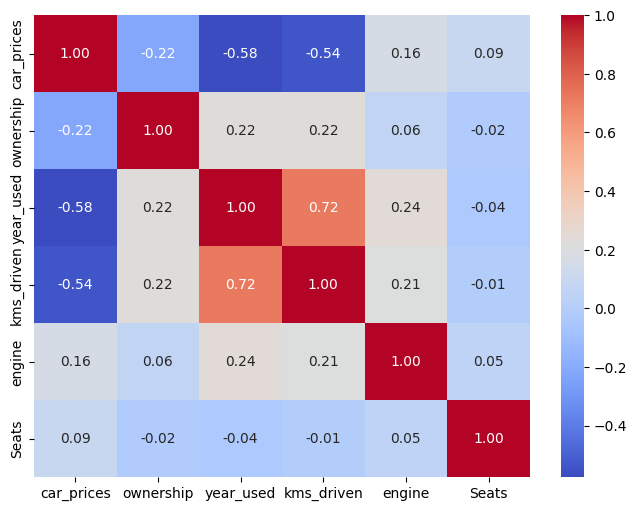

In [201]:
#ماتریس برای دیدت ارتباط فیچرها با قیمت استفاده می‌کنیم
cols_to_use = ['car_prices', 'ownership', 'year_used', 'kms_driven', 'engine', 'Seats']
for col in cols_to_use:
    df = df[df[col] != 'POA']

for col in cols_to_use:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=cols_to_use)

corr_matrix = df[cols_to_use].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

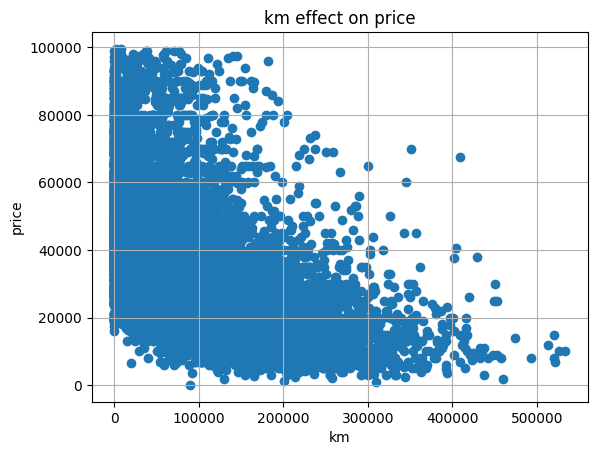

In [202]:
#ارتباط قیمت و کیلومتر ماشین
plt.scatter(df['kms_driven'], df['car_prices'])
plt.xlabel('km')
plt.ylabel('price')
plt.title('km effect on price')
plt.grid(True)
plt.show()

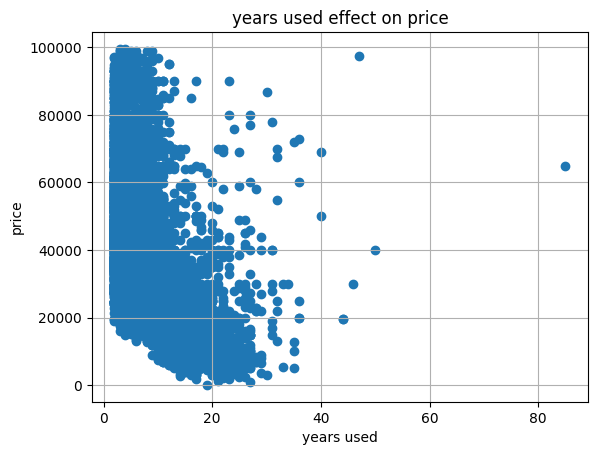

In [203]:
#ارتباط قیمت و سالی که ماشین داره استفاده میشه
plt.scatter(df['year_used'], df['car_prices'])
plt.xlabel('years used')
plt.ylabel('price')
plt.title('years used effect on price')
plt.grid(True)
plt.show()

## Lasso Regression📈

In [204]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

X = df_norm.drop(["car_prices"],axis=1)
y = df_norm["car_prices"]
#مدل لاسو خودش الفا رو با امتجان کردن پیدا میکنه 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
#مقادیر برای تحلیل خروجی مدل
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:",  mean_squared_error(y_test, y_pred))

coefs = pd.Series(lasso.coef_, index=X.columns)
print("**important features:")
print(coefs[coefs != 0].sort_values(ascending=False))

R² score: 0.5960103865254891
RMSE: 0.6373600434769037
MSE: 0.4062278250208805
**important features:
engine                0.311465
Seats                 0.062185
transmission          0.032480
fuel_type_Other      -0.120229
fuel_type_Premium    -0.288937
year_used            -0.331722
kms_driven           -0.374681
ownership            -0.435280
fuel_type_Unleaded   -0.726999
dtype: float64


In [205]:
print(len(y_test), len(y_pred))

3122 3122


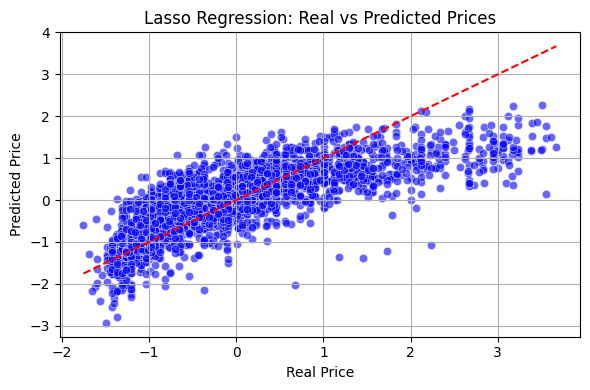

In [206]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط y = x
#رسم مقادیر واقعی در مقابل مقادیر پیش بینی شده
plt.title("Lasso Regression: Real vs Predicted Prices")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forset🌲

In [208]:
#رسم ۱۰۰ درخت تصمیم
X = df.drop(["car_prices"],axis=1)
y = df["car_prices"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" RMSE:", rmse)
print(" R²:", r2)
print("MSE:",  mean_squared_error(y_test, y_pred))
#اهمیت ویژگی ها به ترتیب
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(" Feature Importances:")
print(feature_importances.sort_values(ascending=False))

 RMSE: 10770.73635129439
 R²: 0.6453077537056268
MSE: 116008761.5490944
 Feature Importances:
year_used             0.432344
kms_driven            0.278357
engine                0.117232
fuel_type_Unleaded    0.097362
Seats                 0.034532
fuel_type_Premium     0.017309
transmission          0.009710
fuel_type_Other       0.009150
ownership             0.004005
dtype: float64


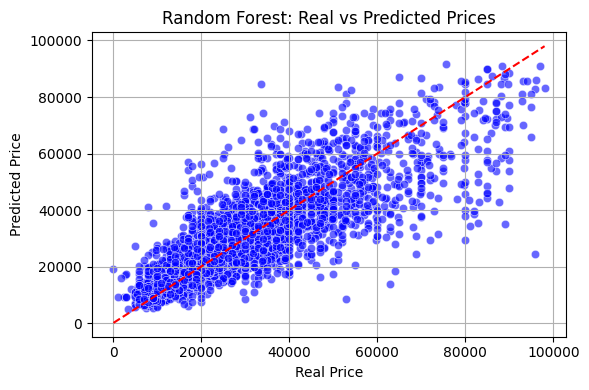

In [209]:
#رسم مقادیر واقعی در مقابل مقادیر پیش بینی شده
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط y = x
plt.title("Random Forest: Real vs Predicted Prices")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

## Gradient Boosting🍇

In [210]:
from sklearn.ensemble import GradientBoostingRegressor
X = df.drop(["car_prices"],axis=1)
y = df["car_prices"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MSE:",  mean_squared_error(y_test, y_pred))
importances = model.feature_importances_
#ترتیب اهمیت ویژگی ها
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

R² score: 0.7187944597280651
RMSE: 9590.284354455156
MSE: 91973553.99930736
              Feature  Importance
5           year_used    0.518660
2              engine    0.159017
3          kms_driven    0.135820
8  fuel_type_Unleaded    0.127187
4               Seats    0.031940
7   fuel_type_Premium    0.013631
1        transmission    0.005087
6     fuel_type_Other    0.004440
0           ownership    0.004217


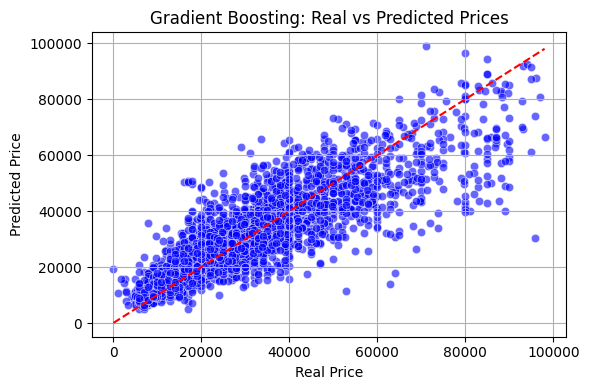

In [211]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط y = x
plt.title("Gradient Boosting: Real vs Predicted Prices")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

## Neural Network🧠

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df_norm.drop('car_prices', axis=1)
y = df_norm['car_prices']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#شبکه عصبی با دو لایه پنهانی
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # لایه اول
    Dense(32, activation='relu'),                                   # لایه دوم
    Dense(1)                                                        # لایه خروجی (پیش‌بینی قیمت)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=32)

loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error (MAE):", mae)
y_pred = model.predict(X_test).reshape(-1)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" RMSE:", rmse)
print(" R²:", r2)
print("MSE:",  mean_squared_error(y_test, y_pred))

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # خط y = x
plt.title("Neural Network: Real vs Predicted Prices")
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#خطا در هر تکرار
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()